In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('Mall_Customers.csv')
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [3]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [4]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,count
Cluster,
0,112
2,34
3,24
-1,18
1,8
4,4


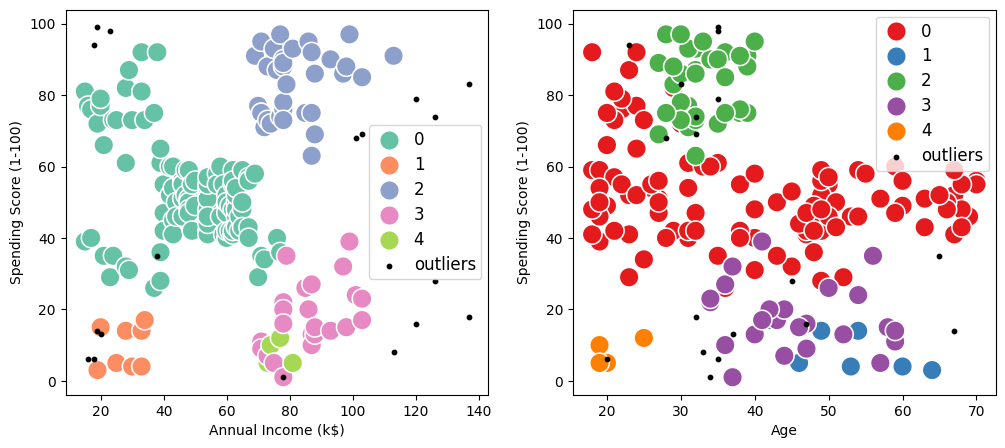

In [5]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=10, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                s=10, label='outliers', c="k")

axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()
